# Modelo de regresión logística
## Wilder Araque Caicedo
## Análisis de Datos
## UNAD

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline

In [6]:
# Cargue del dataset heart_cleveland_upload.csv desde ruta del notebook
heart = pd.read_csv('heart_cleveland_upload.csv')
# Cargue de la información del dataset
heart.head()
# Información del dataset: cantidad de datos, columnas y tipo de dato
heart.info()
# Identificación de la mediana, valor mínimo y máximo y los cuartiles
heart.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


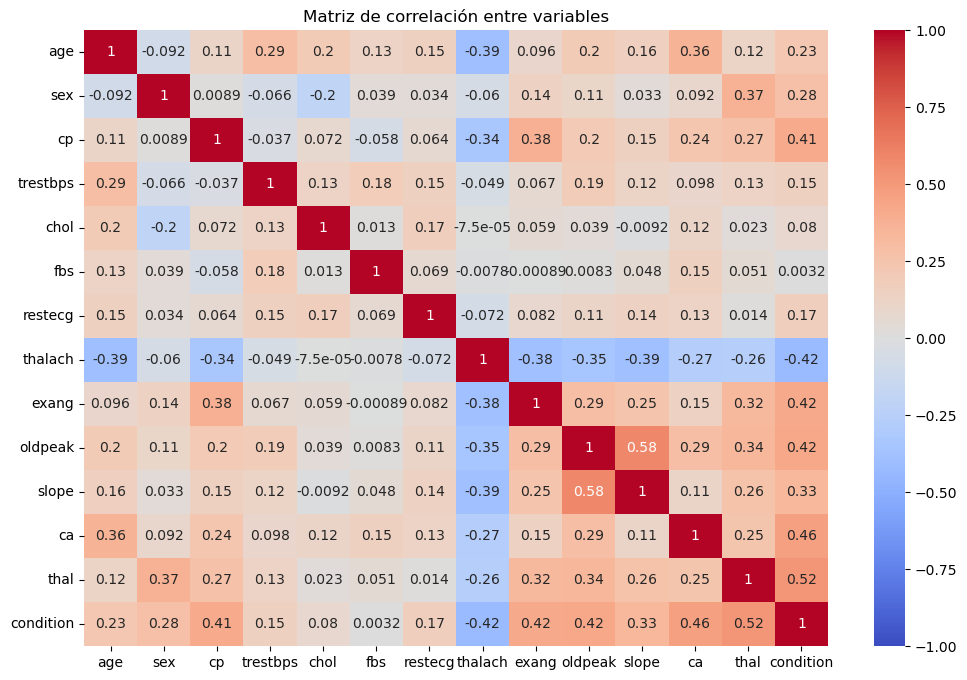

In [12]:
# Correlaciones entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(heart.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación entre variables")
plt.show()

In [42]:
# Filtrado de columnas del modelo 

heart = heart[['age','cp','fbs','slope','condition']]

heart.head()

,age,cp,fbs,slope,condition
23,74,1,0,0,0
24,71,1,0,0,0
25,70,1,0,0,0
27,63,1,0,0,0
28,62,1,0,1,1


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos cp (chest pain type)')

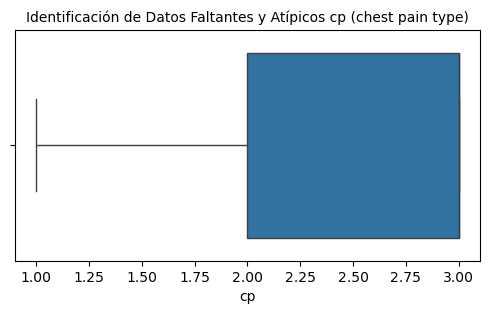

In [44]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=heart['cp'])
plt.title('Identificación de Datos Faltantes y Atípicos cp (chest pain type)', fontsize=10 )

In [32]:
# Identificación de valores atípicos usando el rango intercuartílico (IQR)
Q1 = heart.quantile(0.25)
Q3 = heart.quantile(0.75)
IQR = Q3 - Q1

# Filtrar valores atípicos
heart = heart[~((heart < (Q1 - 1.5 * IQR)) | (heart > (Q3 + 1.5 * IQR))).any(axis=1)]

In [34]:
# Reemplazo de valores en flatantes con la media
heart.fillna(heart.mean(), inplace=True)

In [82]:
# Entrenamiento del modelo
X = heart.drop(columns='condition') 
y = heart['cp']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
regresionLogistica = LogisticRegression()
regresionLogistica.fit(X_train, y_train)

# Predicciones y evaluación
X, y = make_classification(random_state=42)
y_pred = regresionLogistica.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        24

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

[[ 6  0  0]
 [ 0 12  0]
 [ 0  0 24]]


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


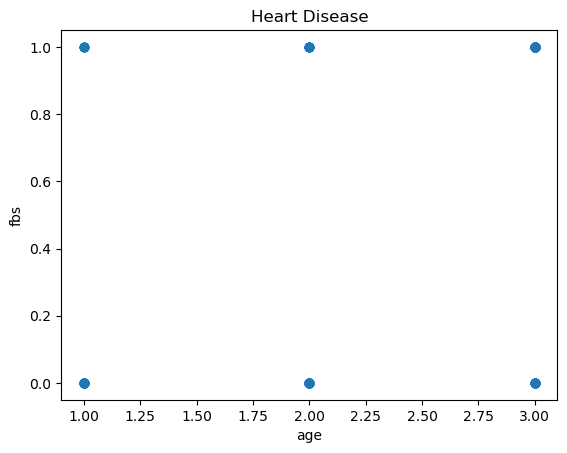

In [84]:
# Grafica antes del agrupamiento

plt.scatter(heart['cp'], heart['condition'])
plt.xlabel('age')
plt.ylabel('fbs')
plt.title('Heart Disease')
plt.show()

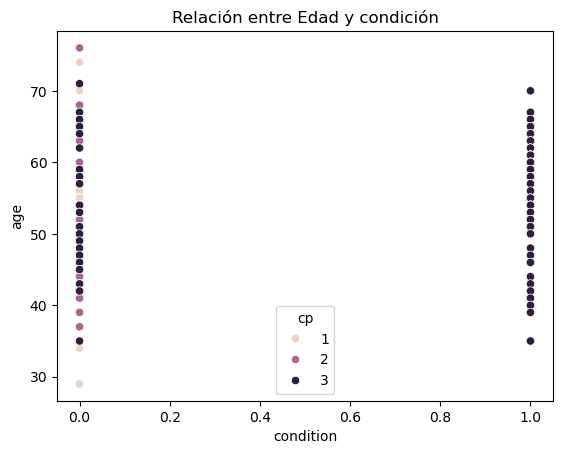

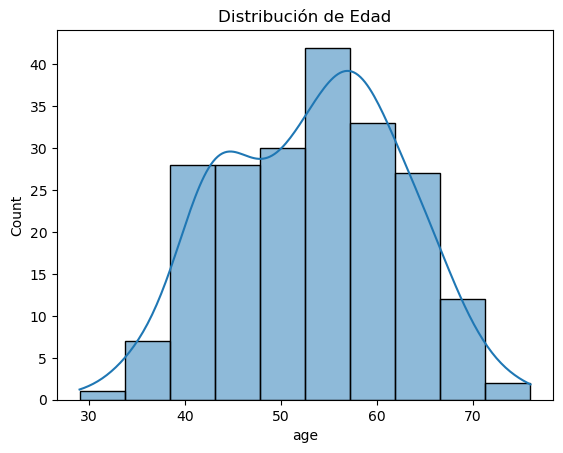

In [86]:
sns.scatterplot(x='condition', y='age', data=heart, hue='cp')
plt.title("Relación entre Edad y condición")
plt.show()

sns.histplot(heart['age'], kde=True)
plt.title("Distribución de Edad")
plt.show()